In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataframe = pd.read_csv('data/final-data/finalize_dataCombine.csv')
dataframe.head()
dataframe.dropna(inplace = True)
dataframe.head()
# independent features
X=dataframe.iloc[:,:-1]
# dependent features
y=dataframe.iloc[:,-1]

In [ ]:
columns = dataframe.columns
columns

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

In [ ]:
features = ['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']

<Axes: xlabel='T', ylabel='PM 2.5'>

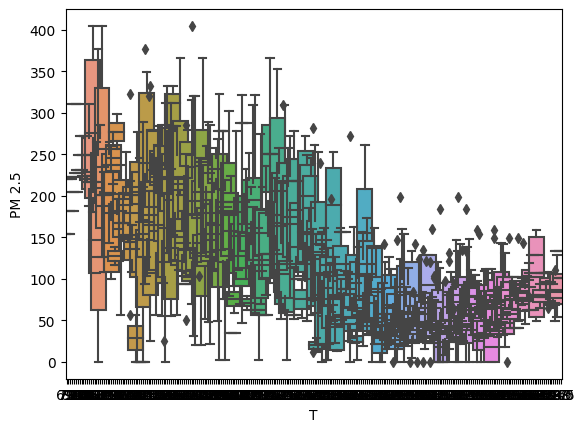

In [ ]:
sns.boxplot(x="T", y="PM 2.5", width = 8, data=dataframe)

In [ ]:
dataframe.shape

(1090, 9)

In [ ]:
dataframe.describe

<bound method NDFrame.describe of          T    TM   Tm     SLP     H   VV    V    VM      PM 2.5
1      7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4  219.720833
3      7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1  182.187500
5      6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1  154.037500
7      8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6  223.208333
9     12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2  200.645833
...    ...   ...  ...     ...   ...  ...  ...   ...         ...
2171  11.3  22.3  4.7  1017.7  82.0  1.1  3.0   3.5  310.250000
2173  12.3  19.4  6.2  1016.8  80.0  1.3  6.7  25.9  204.375000
2175  11.1  20.6  3.6  1015.7  76.0  1.3  3.0   9.4  223.250000
2177  11.6  21.4  3.4  1017.1  76.0  1.1  2.4   5.4  248.958333
2179  12.0  22.9  3.8  1021.2  73.0  0.8  4.8  25.9    0.000000

[1090 rows x 9 columns]>

In [ ]:
def plot_boxplot(df, ft):
  df.boxplot(column=[ft])
  plt.grid(False)
  plt.tight_layout()
  plt.show()

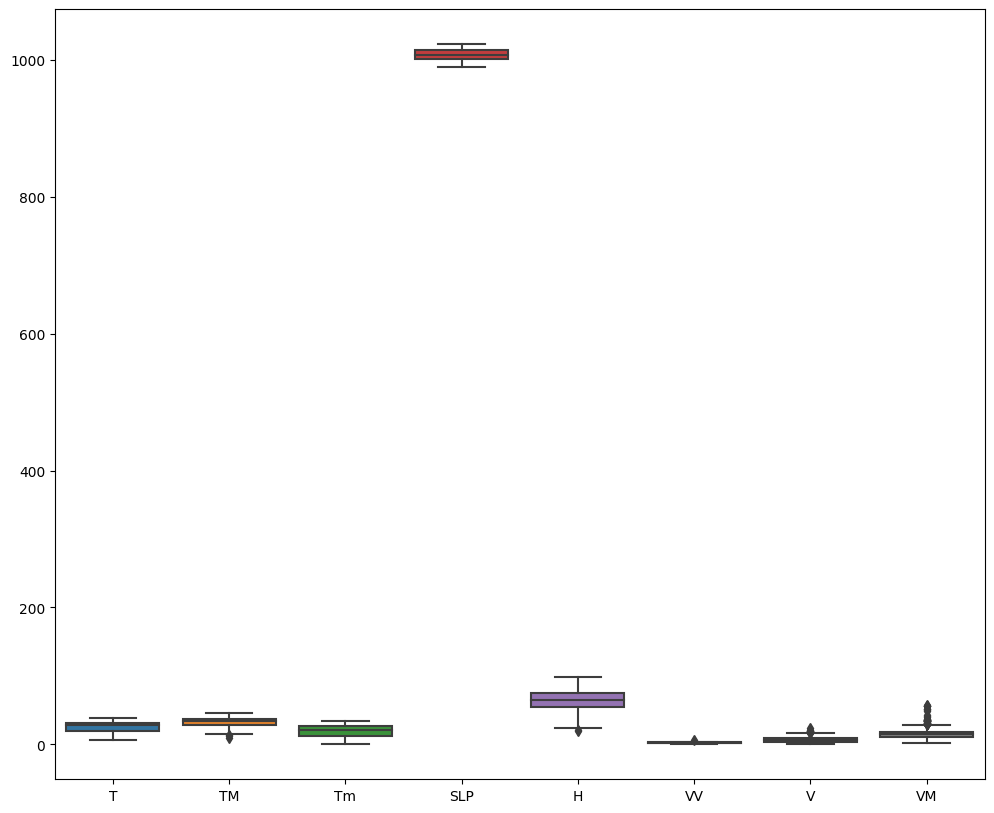

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
sns.boxplot(data=dataframe[features], ax=ax)
plt.show()

In [ ]:
def outliers(df,ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  IQR = Q3 - Q1
  upper=Q3+1.5*IQR
  lower=Q1-1.5*IQR

  ls = dataframe.index[(df[ft] < lower) | (df[ft] > upper)]
  return ls

In [ ]:
index_list = []
for feature in features:
  index_list.extend(outliers(dataframe,feature))

In [ ]:
index_list

[1,
 3,
 5,
 867,
 1227,
 1293,
 61,
 525,
 545,
 599,
 601,
 859,
 903,
 939,
 1155,
 1207,
 1517,
 1683,
 1993,
 1997,
 61,
 63,
 207,
 239,
 245,
 269,
 363,
 405,
 407,
 525,
 531,
 537,
 583,
 601,
 619,
 825,
 859,
 879,
 887,
 893,
 921,
 939,
 993,
 995,
 1207,
 1215,
 1227,
 1271,
 1385,
 1509,
 1517,
 1519,
 1549,
 1579,
 1581,
 1621,
 1623,
 1629,
 1631,
 1939,
 1951,
 1955,
 1961,
 1981,
 1991,
 1993,
 2005]

In [ ]:
len(index_list)

67

In [ ]:
def remove(df,ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df


In [ ]:
df_cleaned = remove(dataframe,index_list)

In [ ]:
df_cleaned.shape

(1032, 9)

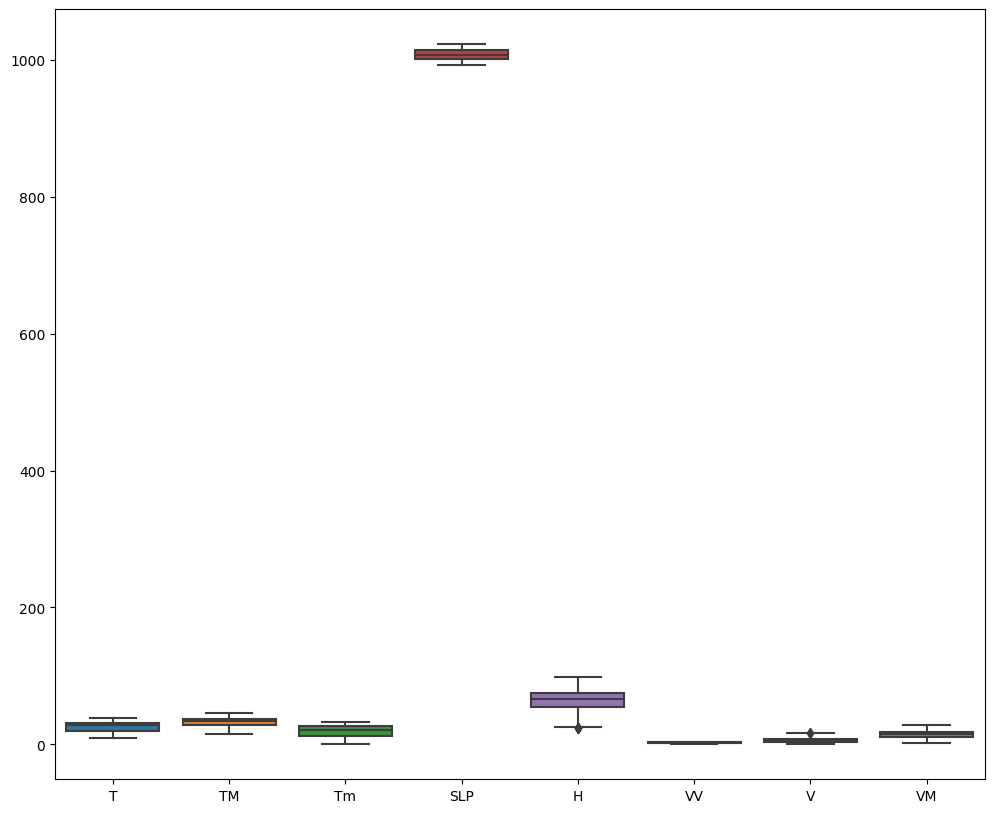

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
sns.boxplot(data=df_cleaned[features], ax=ax)
plt.show()

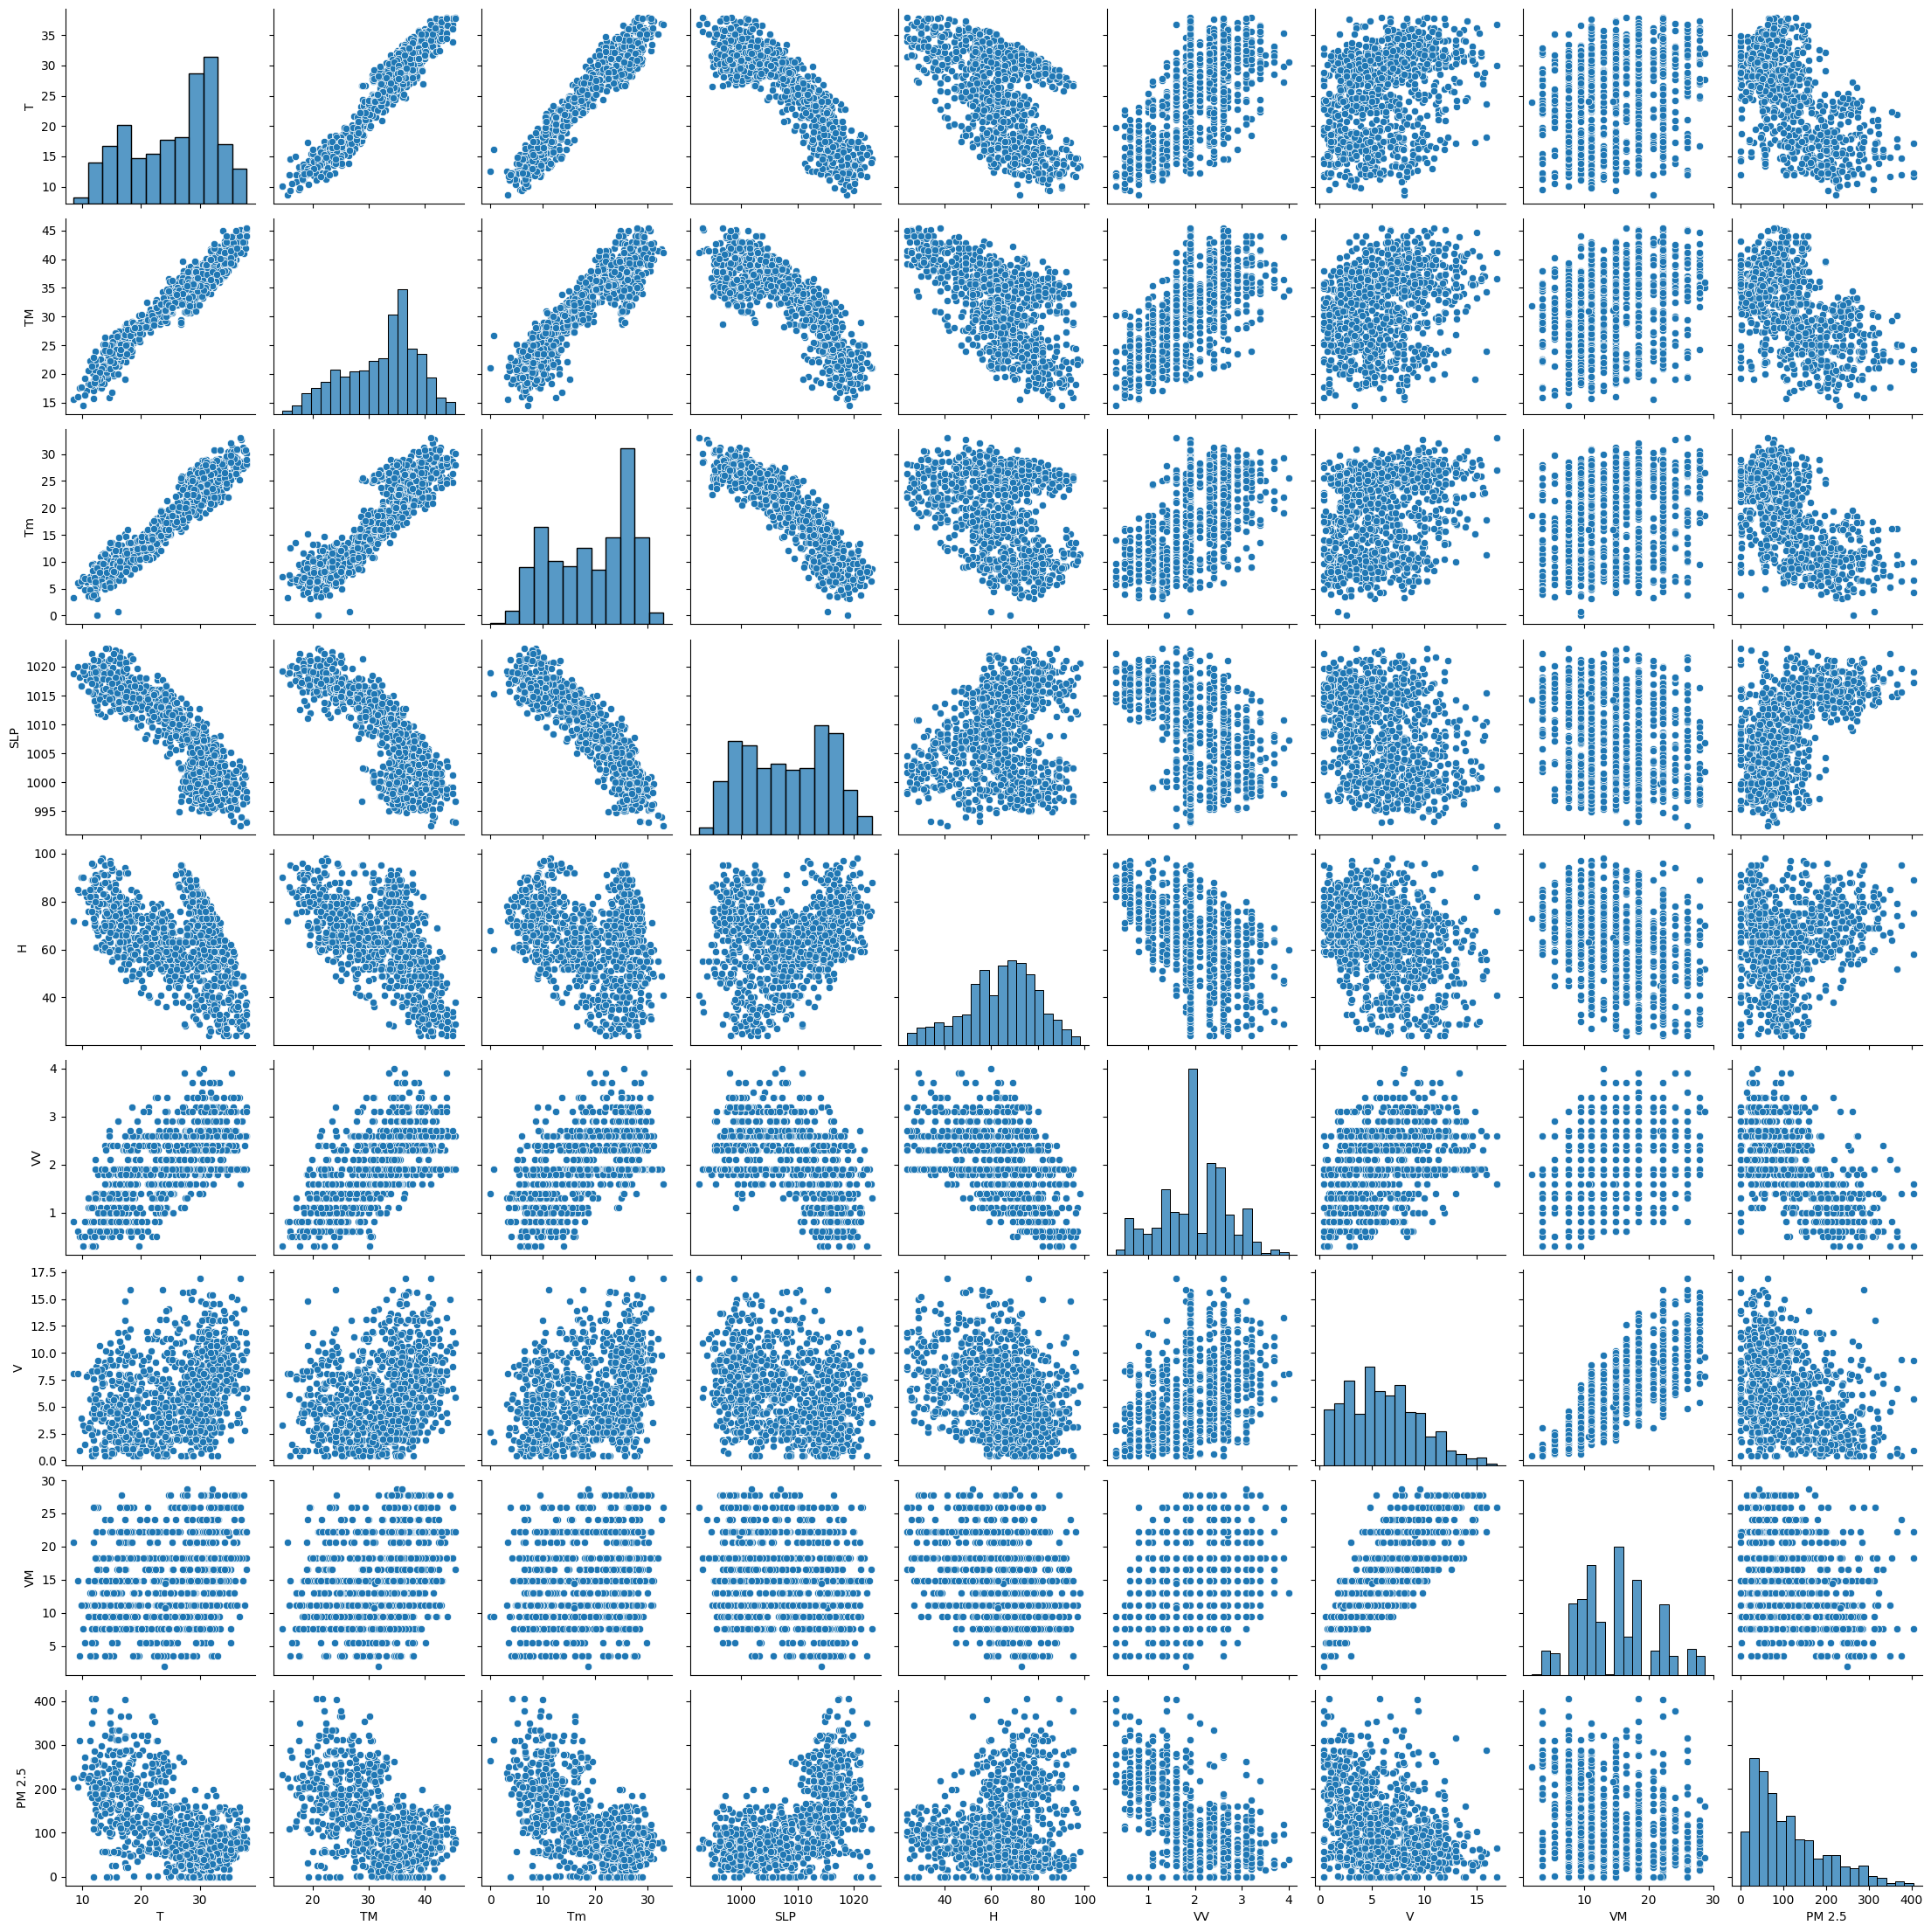

In [ ]:
sns.pairplot(df_cleaned)

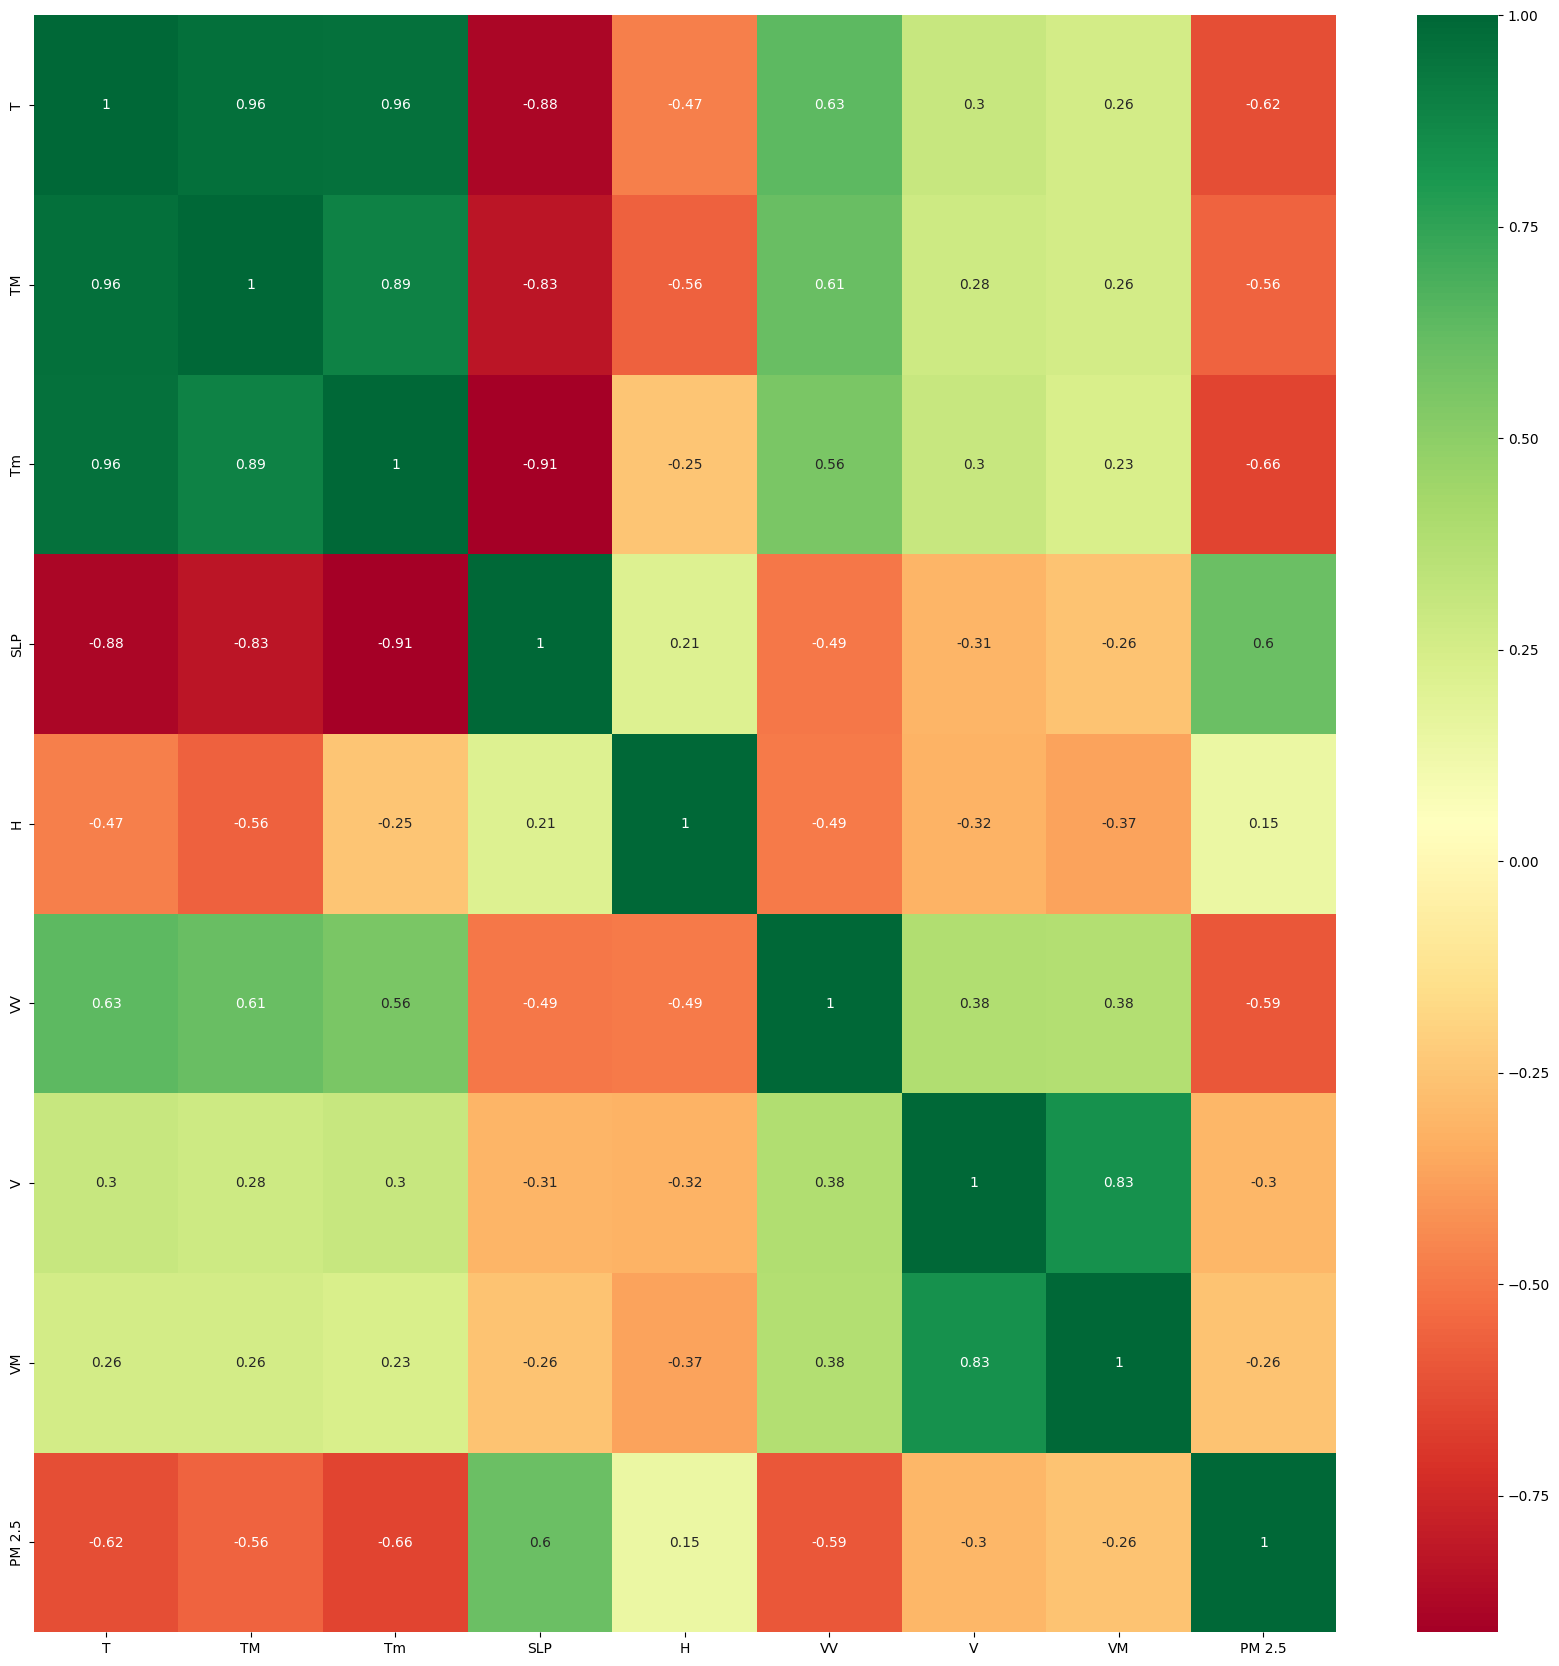

In [ ]:
plt.figure(figsize = (21,21))
sns.heatmap(df_cleaned.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [ ]:
X=df_cleaned.iloc[:,:-1]
# dependent features
y=df_cleaned.iloc[:,-1]

In [ ]:
## function to store error values

def store_errors(model_name, mae, mse, rmse, r2):
    List_errors = []
    List_errors.append(model_name)
    List_errors.append(mae)
    List_errors.append(mse)
    List_errors.append(rmse)
    List_errors.append(r2)
    return List_errors

model_errors = []

<ipython-input-16-38e0f8b955cf>:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ytst-model1_prediction)


MAE: 43.36473232424761
MSE: 3539.7397075438994
RMSE: 59.49571167356434


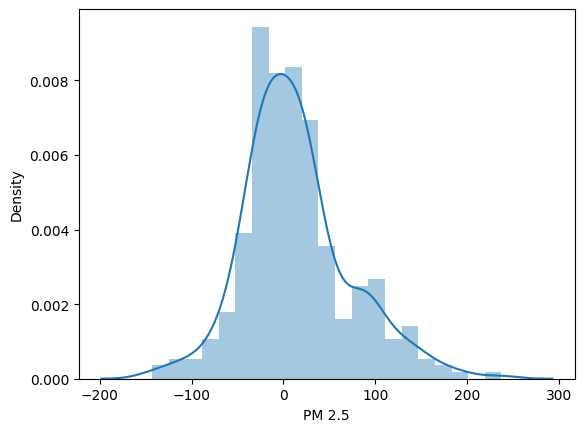

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtst, ytrain, ytst = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(Xtrain,ytrain)

model1.coef_

model1.intercept_

model1.score(Xtrain, ytrain)

model1.score(Xtst, ytst)

coeff_df = pd.DataFrame(model1.coef_,X.columns,columns=['Coefficient'])
coeff_df

model1_prediction=model1.predict(Xtst)

sns.distplot(ytst-model1_prediction)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(ytst, model1_prediction))
print('MSE:', metrics.mean_squared_error(ytst, model1_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytst, model1_prediction)))

mae = metrics.mean_absolute_error(ytst, model1_prediction)
mse = metrics.mean_squared_error(ytst, model1_prediction)
rmse = np.sqrt(metrics.mean_squared_error(ytst, model1_prediction))
r2 = metrics.r2_score(ytst, model1_prediction)

model_errors.append(store_errors('Linear Regression', mae, mse, rmse,r2))

In [ ]:
model_errors

[['Linear Regression',
  43.36473232424761,
  3539.7397075438994,
  59.49571167356434,
  0.5304376759411296]]

<ipython-input-18-62923dba3e26>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ytst-model2_prediction)


Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


ValueError: ignored

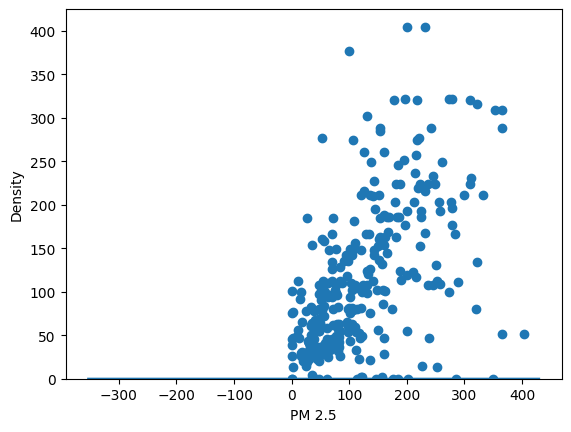

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor()
model2.fit(Xtrain,ytrain)

model2.score(Xtrain, ytrain)

model2.score(Xtst, ytst)

model2_prediction=model2.predict(Xtst)

sns.distplot(ytst-model2_prediction)

plt.scatter(ytst,model2_prediction)

DecisionTreeRegressor()

parameters={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
}

from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(model2,param_grid=parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)
grid_search.fit(X,y)

grid_search.best_params_

grid_search.best_score_

model2_prediction_2 =  grid_search.predict(Xtst)

sns.distplot(ytst-model2_prediction_2)

print('MAE:', metrics.mean_absolute_error(ytst, model2_prediction_2))
print('MSE:', metrics.mean_squared_error(ytst, model2_prediction_2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytst, model2_prediction_2)))
 
mae = metrics.mean_absolute_error(ytst, model2_prediction_2)
mse = metrics.mean_squared_error(ytst, model2_prediction_2)
rmse = np.sqrt(metrics.mean_squared_error(ytst, model2_prediction_2))
model_errors.append(store_errors('Decision Tree', mae, mse, rmse))

<ipython-input-21-bde734edc24a>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ytst-model2_prediction)


Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


<ipython-input-21-bde734edc24a>:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ytst-model2_prediction_2)


MAE: 41.678657469055786
MSE: 3434.4429695235226
RMSE: 58.60412075548547


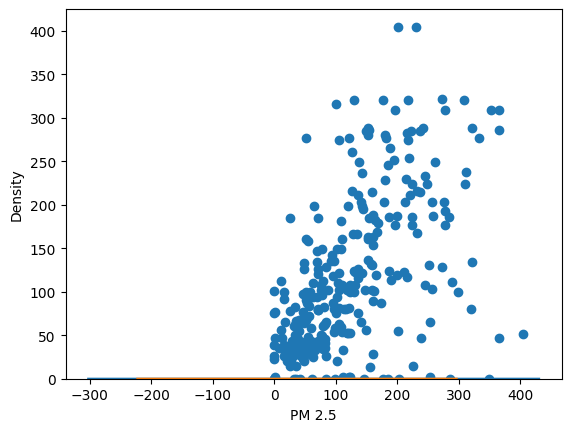

In [ ]:
## Desision Tree Without Plot
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor()
model2.fit(Xtrain,ytrain)

model2.score(Xtrain, ytrain)

model2.score(Xtst, ytst)

model2_prediction=model2.predict(Xtst)

sns.distplot(ytst-model2_prediction)

plt.scatter(ytst,model2_prediction)

DecisionTreeRegressor()

parameters={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
}

from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(model2,param_grid=parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)
grid_search.fit(X,y)

grid_search.best_params_

grid_search.best_score_

model2_prediction_2 =  grid_search.predict(Xtst)

sns.distplot(ytst-model2_prediction_2)

print('MAE:', metrics.mean_absolute_error(ytst, model2_prediction_2))
print('MSE:', metrics.mean_squared_error(ytst, model2_prediction_2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytst, model2_prediction_2)))
 
mae = metrics.mean_absolute_error(ytst, model2_prediction_2)
mse = metrics.mean_squared_error(ytst, model2_prediction_2)
rmse = np.sqrt(metrics.mean_squared_error(ytst, model2_prediction_2))
r2 = metrics.r2_score(ytst, model2_prediction_2)
model_errors.append(store_errors('Decision Tree', mae, mse, rmse,r2))

<ipython-input-22-7156e6a0f648>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ytst-model3_prediction)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=-2830.348 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=-2618.039 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=-2281.949 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=-2902.403 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=-3354.966 total time=   1.4s
[CV 1/5] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700;, score=-2764.889 total time=   1.4s
[CV 2/5] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700;, score=-2613.093 total time=   1.4s
[CV 3/5] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700;, score=-2315.815 total time=   1.4s
[CV 4/5] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700;, score=-3006.637 total time=   1.4s
[CV 5/5] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700;, score=-3536.897 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=500;, score=-2722.594 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=500;, score=-2612.324 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=500;, score=-2279.971 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=500;, score=-3006.352 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=500;, score=-3388.212 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-2937.472 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-2695.289 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-2253.825 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-2867.498 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-3182.252 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1200;, score=-2825.449 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1200;, score=-2672.599 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1200;, score=-2508.239 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1200;, score=-3405.332 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1200;, score=-3818.061 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=-2761.417 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=-2644.844 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=-2323.511 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=-3012.597 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=-3542.931 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200;, score=-2780.867 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200;, score=-2632.797 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200;, score=-2280.534 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200;, score=-2916.817 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200;, score=-3338.714 total time=   4.5s
[CV 1/5] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=300;, score=-2774.068 total time=   0.6s
[CV 2/5] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=300;, score=-2555.049 total time=   0.6s
[CV 3/5] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=300;, score=-2337.555 total time=   0.6s
[CV 4/5] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=300;, score=-3139.536 total time=   0.6s
[CV 5/5] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=300;, score=-3660.776 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=900;, score=-2763.900 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=900;, score=-2625.959 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=900;, score=-2266.155 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=900;, score=-2984.564 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=900;, score=-3352.462 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-2696.374 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-2593.831 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-2353.980 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-3156.238 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-3708.660 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000;, score=-2691.830 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000;, score=-2608.248 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000;, score=-2208.720 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000;, score=-3105.310 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000;, score=-3392.461 total time=   2.5s
[CV 1/5] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1000;, score=-2996.223 total time=   1.6s
[CV 2/5] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1000;, score=-2562.520 total time=   2.6s
[CV 3/5] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1000;, score=-2742.711 total time=   2.4s
[CV 4/5] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1000;, score=-3559.499 total time=   1.6s
[CV 5/5] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1000;, score=-3838.240 total time=   1.6s
[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600;, score=-2786.980 total time=   1.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-2744.845 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-2565.560 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-2364.256 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-3128.400 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-3706.400 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=300;, score=-2740.213 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=300;, score=-2550.201 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=300;, score=-2385.167 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=300;, score=-3181.911 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=300;, score=-3650.143 total time=   0.8s
[CV 1/5] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700;, score=-2759.784 total time=   1.2s
[CV 2/5] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700;, score=-2524.411 total time=   1.2s
[CV 3/5] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700;, score=-2416.094 total time=   1.2s
[CV 4/5] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700;, score=-3300.011 total time=   1.2s
[CV 5/5] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700;, score=-3721.097 total time=   1.2s
[CV 1/5] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=600;, score=-2766.554 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=-2807.724 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=-2699.283 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=-2290.577 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=-2939.708 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=-3281.397 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=-2739.865 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=-2634.804 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=-2346.566 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=-2978.190 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=-3509.699 total time=   1.0s
[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-2733.246 total time=   0.6s
[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-2634.986 total time=   0.6s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-2425.474 total time=   0.6s
[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-3230.629 total time=   0.6s
[CV 5/5] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-3717.376 total time=   0.6s
[CV 1/5] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=-2745.004 total time=   1.0s
[CV 2/5] EN

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000;, score=-2688.766 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000;, score=-2588.977 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000;, score=-2217.728 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000;, score=-3064.983 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000;, score=-3378.556 total time=   4.0s
[CV 1/5] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800;, score=-2768.628 total time=   1.7s
[CV 2/5] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800;, score=-2602.729 total time=   1.7s
[CV 3/5] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800;, score=-2297.839 total time=   1.6s
[CV 4/5] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800;, score=-3011.591 total time=   1.6s
[CV 5/5] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800;, score=-3466.723 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=500;, score=-2714.051 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=500;, score=-2578.914 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=500;, score=-2350.216 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=500;, score=-3115.343 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=500;, score=-3632.671 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=800;, score=-2706.533 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=800;, score=-2627.274 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=800;, score=-2244.604 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=800;, score=-3020.380 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=800;, score=-3328.589 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=-2805.338 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=-2659.756 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=-2263.722 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=-2955.503 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=-3327.790 total time=   1.0s
[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=900;, score=-2775.072 total time=   1.6s
[CV 2/5] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=900;, score=-2527.036 total time=   1.8s
[CV 3/5] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=900;, score=-2428.562 total time=   2.5s
[CV 4/5] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=900;, score=-3287.802 total time=   2.2s
[CV 5/5] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=900;, score=-3733.880 total time=   1.6s
[CV 1/5] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=-2766.022 total time=   0.8s
[CV 2/5

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1200;, score=-2737.629 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1200;, score=-2649.060 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1200;, score=-2252.893 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1200;, score=-3031.101 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1200;, score=-3321.747 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1200;, score=-2735.773 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1200;, score=-2581.156 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1200;, score=-2365.910 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1200;, score=-3146.540 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1200;, score=-3636.567 total time=   4.9s
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1200;, score=-2759.884 total time=   2.2s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1200;, score=-2550.193 total time=   2.3s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1200;, score=-2422.716 total time=   2.1s
[CV 4/5] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1200;, score=-3297.472 total time=   2.2s
[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1200;, score=-3721.940 total time=   3.3s
[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=400;, score=-2970.565 total time=   1.0s

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000;, score=-2810.180 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000;, score=-2632.836 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000;, score=-2279.483 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000;, score=-3034.663 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000;, score=-3303.779 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-2704.258 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-2608.952 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-2328.126 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-3164.621 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-3627.749 total time=   0.3s
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=500;, score=-2756.430 total time=   1.2s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=500;, score=-2571.618 total time=   1.5s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=500;, score=-2359.915 total time=   1.4s
[CV 4/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=500;, score=-3096.461 total time=   1.3s
[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=500;, score=-3544.969 total time=   1.0s
[CV 1/5] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600;, score=-2746.732 total time=   1.2s
[CV 2/

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=700;, score=-2726.815 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=700;, score=-2560.793 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=700;, score=-2369.929 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=700;, score=-3165.270 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=700;, score=-3673.676 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000;, score=-2831.656 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000;, score=-2649.868 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000;, score=-2277.027 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000;, score=-2951.356 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000;, score=-3323.131 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=500;, score=-2722.814 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=500;, score=-2637.780 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=500;, score=-2215.645 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=500;, score=-3042.944 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=500;, score=-3300.999 total time=   1.5s
[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1100;, score=-2763.780 total time=   1.8s
[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1100;, score=-2620.848 total time=   1.9s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1100;, score=-2380.937 total time=   2.9s
[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1100;, score=-3258.990 total time=   2.6s
[CV 5/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1100;, score=-3618.701 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-2709.772 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-2655.033 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-2245.553 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-3105.662 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-3393.252 total time=   0.3s
[CV 1/5] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=-2771.401 total time=   0.7s
[CV 2/5] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=-2637.963 total time=   0.6s
[CV 3/5] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=-2336.108 total time=   0.6s
[CV 4/5] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=-3016.242 total time=   0.6s
[CV 5/5] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=-3520.319 total time=   0.6s
[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=900;, score=-2955.678 total time=   1.4s
[CV 2/5] EN

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=-2816.778 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=-2687.660 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=-2299.427 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=-2958.369 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=-3308.734 total time=   1.5s
[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=800;, score=-2764.684 total time=   1.4s
[CV 2/5] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=800;, score=-2538.826 total time=   1.4s
[CV 3/5] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=800;, score=-2429.201 total time=   1.4s
[CV 4/5] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=800;, score=-3281.450 total time=   1.4s
[CV 5/5] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=800;, score=-3718.451 total time=   1.4s
[CV 1/5] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=700;, score=-2776.860 total time=   1.2s
[CV 2/

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=400;, score=-2738.761 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=400;, score=-2610.985 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=400;, score=-2258.096 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=400;, score=-3003.685 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=400;, score=-3339.679 total time=   1.5s
[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-2785.259 total time=   0.3s
[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-2559.420 total time=   0.3s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-2459.013 total time=   0.3s
[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-3346.913 total time=   0.3s
[CV 5/5] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-3774.550 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1200;, score=-2846.686 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1200;, score=-2678.193 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1200;, score=-2535.904 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1200;, score=-3411.373 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1200;, score=-3814.313 total time=   2.8s
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-2812.062 total time=   0.3s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-2728.812 total time=   0.3s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-2307.223 total time=   0.3s
[CV 4/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-3110.775 total time=   0.3s
[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-3494.285 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=600;, score=-2744.021 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=600;, score=-2630.240 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=600;, score=-2237.995 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=600;, score=-3028.943 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=600;, score=-3304.925 total time=   1.9s
[CV 1/5] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-2761.329 total time=   0.4s
[CV 2/5] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-2623.408 total time=   0.4s
[CV 3/5] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-2300.678 total time=   0.4s
[CV 4/5] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-3091.928 total time=   0.5s
[CV 5/5] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-3585.838 total time=   0.9s
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=400;, score=-2754.583 total time=   1.3s
[CV 2/5

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=-2762.390 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=-2642.670 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=-2256.234 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=-2985.874 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=-3367.534 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=900;, score=-2803.100 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=900;, score=-2697.231 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=900;, score=-2271.403 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=900;, score=-2946.351 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=900;, score=-3330.404 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900;, score=-2734.078 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900;, score=-2604.661 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900;, score=-2254.035 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900;, score=-3012.735 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900;, score=-3339.683 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-2860.823 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-2598.133 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-2279.009 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-2917.313 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-3333.567 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500;, score=-2715.415 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500;, score=-2573.408 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500;, score=-2221.537 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500;, score=-3115.423 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500;, score=-3410.220 total time=   1.3s
[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=500;, score=-2764.564 total time=   0.9s
[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=500;, score=-2585.056 total time=   0.9s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=500;, score=-2403.687 total time=   1.0s
[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=500;, score=-3279.475 total time=   1.3s
[CV 5/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=500;, score=-3633.986 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=200;, score=-2850.847 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=200;, score=-2674.335 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=200;, score=-2546.145 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=200;, score=-3414.767 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=200;, score=-3817.880 total time=   0.5s
[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=800;, score=-2760.877 total time=   1.4s
[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=800;, score=-2538.223 total time=   1.4s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=800;, score=-2402.535 total time=   1.4s
[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=800;, score=-3254.542 total time=   1.4s
[CV 5/5] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=800;, score=-3704.566 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1000;, score=-2817.174 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1000;, score=-2678.254 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1000;, score=-2531.508 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1000;, score=-3411.723 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1000;, score=-3821.075 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=200;, score=-2746.556 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=200;, score=-2566.109 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=200;, score=-2397.922 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=200;, score=-3147.391 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=200;, score=-3627.940 total time=   0.6s
[CV 1/5] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=-2738.318 total time=   1.0s
[CV 2/5] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=-2614.918 total time=   1.2s
[CV 3/5] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=-2306.552 total time=   1.6s
[CV 4/5] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=-3034.097 total time=   1.6s
[CV 5/5] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=-3475.374 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1100;, score=-2710.805 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1100;, score=-2563.512 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1100;, score=-2355.547 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1100;, score=-3143.127 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1100;, score=-3652.810 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=700;, score=-2721.053 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=700;, score=-2570.089 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=700;, score=-2340.485 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=700;, score=-3157.422 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=700;, score=-3660.517 total time=   2.4s
[CV 1/5] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900;, score=-2741.423 total time=   2.9s
[CV 2/5] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900;, score=-2598.484 total time=   1.9s
[CV 3/5] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900;, score=-2290.574 total time=   1.7s
[CV 4/5] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900;, score=-3069.397 total time=   1.7s
[CV 5/5] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900;, score=-3517.880 total time=   1.7s
[CV 1/5] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-3004.451 total time=   0.2s
[CV

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=400;, score=-2729.140 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=400;, score=-2605.917 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=400;, score=-2240.020 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=400;, score=-2989.493 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=400;, score=-3330.109 total time=   1.4s
[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-2759.589 total time=   0.3s
[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-2630.200 total time=   0.3s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-2423.574 total time=   0.4s
[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-3292.068 total time=   0.4s
[CV 5/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-3577.841 total time=   0.3s
[CV 1/5] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-3027.863 total time=   0.2s
[CV 2/5] E

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=-2765.047 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=-2624.461 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=-2251.210 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=-3035.031 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=-3339.929 total time=   1.1s
[CV 1/5] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=-2749.910 total time=   0.4s
[CV 2/5] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=-2547.236 total time=   0.4s
[CV 3/5] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=-2376.009 total time=   0.4s
[CV 4/5] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=-3140.489 total time=   0.4s
[CV 5/5] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=-3692.121 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=-2769.825 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=-2657.862 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=-2287.609 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=-2928.152 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=-3351.409 total time=   2.4s
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800;, score=-2982.816 total time=   2.0s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800;, score=-2566.611 total time=   1.6s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800;, score=-2743.949 total time=   1.3s
[CV 4/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800;, score=-3602.803 total time=   1.3s
[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800;, score=-3851.431 total time=   1.3s
[CV 1/5] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=800;, score=-2771.859 total time=   1.5s
[C

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200;, score=-2820.499 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200;, score=-2668.764 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200;, score=-2246.861 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200;, score=-2915.339 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200;, score=-3322.081 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=600;, score=-2741.256 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=600;, score=-2580.496 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=600;, score=-2251.233 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=600;, score=-3010.086 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=600;, score=-3380.275 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1200;, score=-2721.233 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1200;, score=-2572.569 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1200;, score=-2345.567 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1200;, score=-3173.895 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1200;, score=-3669.327 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
<ipython-input-22-7156e6a0f648>:48: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ytst-model3_prediction_2)


MAE: 38.82679290382563
MSE: 3027.4962066938015
RMSE: 55.022688108577555


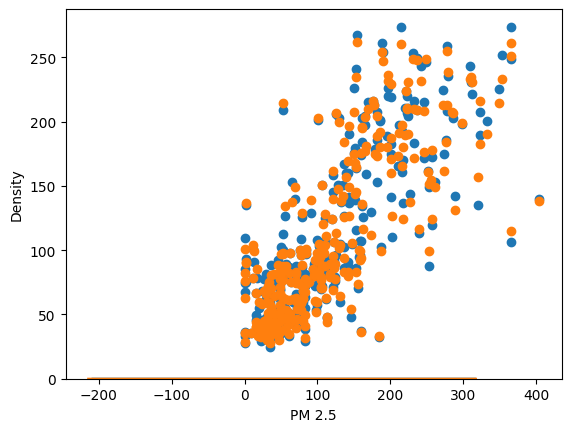

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor()
model3.fit(Xtrain, ytrain)

model3.score(Xtrain, ytrain)

model3.score(Xtst, ytst)

model3_prediction = model3.predict(Xtst)

sns.distplot(ytst-model3_prediction)

plt.scatter(ytst,model3_prediction)

RandomForestRegressor()
from sklearn.model_selection import RandomizedSearchCV

#Randomized Search CV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

min_samples_split = [2, 5, 10, 15, 100]

min_samples_leaf = [1, 2, 5, 10]

rf_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

model3_2 = RandomForestRegressor()

random_search = RandomizedSearchCV(estimator = model3_2, param_distributions = rf_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=3, random_state=None)

random_search.fit(Xtrain,ytrain)

random_search.best_params_

random_search.best_score_

model3_prediction_2 = random_search.predict(Xtst)

sns.distplot(ytst-model3_prediction_2)

plt.scatter(ytst,model3_prediction_2)

print('MAE:', metrics.mean_absolute_error(ytst, model3_prediction_2))
print('MSE:', metrics.mean_squared_error(ytst, model3_prediction_2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytst, model3_prediction_2)))

mae = metrics.mean_absolute_error(ytst, model3_prediction_2)
mse = metrics.mean_squared_error(ytst, model3_prediction_2)
rmse = np.sqrt(metrics.mean_squared_error(ytst, model3_prediction_2))
r2 = metrics.r2_score(ytst, model3_prediction_2)

model_errors.append(store_errors('Random Forest', mae, mse, rmse, r2))

In [ ]:
random_search.score(Xtst, ytst)

-3000.5564560134026

<ipython-input-23-915af33f40da>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ytst-model4_prediction)


[100, 152, 205, 257, 310, 363, 415, 468, 521, 573, 626, 678, 731, 784, 836, 889, 942, 994, 1047, 1100]
{'n_estimators': [100, 152, 205, 257, 310, 363, 415, 468, 521, 573, 626, 678, 731, 784, 836, 889, 942, 994, 1047, 1100], 'learning_rate': ['0.05', '0.1', '0.15', '0.3', '0.6', '0.65'], 'max_depth': [5, 10, 15, 20, 25], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END learning_rate=0.65, max_depth=10, min_child_weight=5, n_estimators=415, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.65, max_depth=10, min_child_weight=5, n_estimators=415, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.65, max_depth=10, min_child_weight=5, n_estimators=415, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.65, max_depth=10, min_child_weight=5, n_estimators=415, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.65, max_depth=10, min_child_weight=5, n_estimators=415, subsamp

<ipython-input-23-915af33f40da>:36: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ytst-model4_predictions3)


MAE: 40.593824670813305
MSE: 3288.5005758118004
RMSE: 57.34544947780774


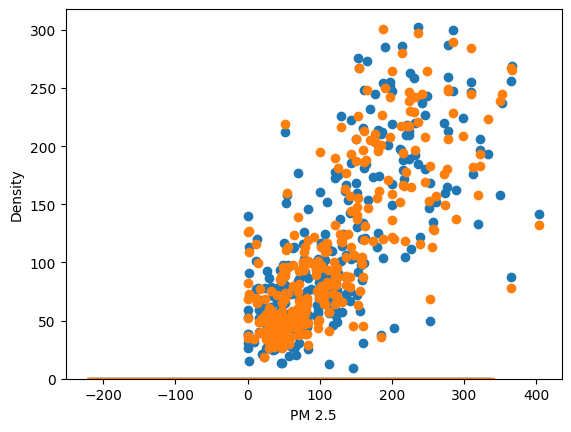

In [ ]:
import xgboost as xg_bst
model4 = xg_bst.XGBRegressor()
model4.fit(Xtrain,ytrain)
model4.score(Xtrain,ytrain)
model4.score(Xtst,ytst)
model4_prediction = model4.predict(Xtst)
sns.distplot(ytst-model4_prediction)
plt.scatter(ytst, model4_prediction)
xg_bst.XGBRegressor()
from sklearn.model_selection import RandomizedSearchCV
no_of_tree = [int(x) for x in np.linspace(start = 100, stop = 1100, num=20)]
print(no_of_tree)
# No of decision trees
no_of_tree = [int(x) for x in np.linspace(start = 100, stop = 1100, num=20)]
# Learning Rate
Learning_Rate = ['0.05','0.1','0.15','0.3','0.6','0.65']
# Max Level of a tree
max_depth = [int(x) for x in np.linspace(5, 25, num = 5)]
#Subssample parameter values
sampling=[0.7,0.6,0.8]
# Minimum child weight parameters
weight_minimum=[3,4,5,6,7]
grid_parameters = {'n_estimators': no_of_tree,
               'learning_rate': Learning_Rate,
               'max_depth': max_depth,
               'subsample': sampling,
               'min_child_weight': weight_minimum }

print(grid_parameters)
model4_prediction1= xg_bst.XGBRegressor()
model4_prediction2 = RandomizedSearchCV(estimator = model4_prediction1, param_distributions = grid_parameters, scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)
model4_prediction2.fit(Xtrain,ytrain)
model4_prediction2.best_params_
model4_prediction2.best_score_
model4_predictions3=model4_prediction2.predict(Xtst)
sns.distplot(ytst-model4_predictions3)
plt.scatter(ytst,model4_predictions3)


from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(ytst, model4_predictions3))
print('MSE:', metrics.mean_squared_error(ytst, model4_predictions3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytst, model4_predictions3)))  

mae = metrics.mean_absolute_error(ytst, model4_predictions3)
mse = metrics.mean_squared_error(ytst, model4_predictions3)
rmse = np.sqrt(metrics.mean_squared_error(ytst, model4_predictions3))
r2 = metrics.r2_score(ytst, model3_prediction_2)
model_errors.append(store_errors('XGBoost', mae, mse, rmse, r2))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 100,225
Trainable params: 100,225
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
58/58 [==============================] - 2s 12ms/step - loss: 65.3422 - mean_absolute_error: 65.3422 - val_loss: 63.5023 - val_mean_absolute_error: 63.5023
Epoch 2/100
58

<ipython-input-24-e142968bdd21>:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ytst.values.reshape(-1,1)-model5_prediction2)


MAE: 42.180476209499275
MSE: 3524.006154012013
RMSE: 59.36334015208387


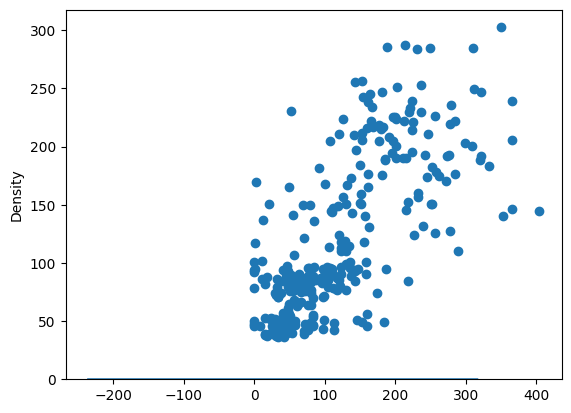

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

## since problem is a linear regression output should be linear activation and 2 hidden layer to train arbitrary functions

model5 = Sequential()

# Input Layer
model5.add(Dense(128, kernel_initializer='normal',input_dim = Xtrain.shape[1], activation='relu'))

# 2 Hidden Layers with relu activation
model5.add(Dense(256, kernel_initializer='normal',activation='relu'))
model5.add(Dense(256, kernel_initializer='normal',activation='relu'))

# Output Layer
model5.add(Dense(1, kernel_initializer='normal',activation='linear'))


model5.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model5.summary()

# Training Set
model5_prediction = model5.fit(Xtrain, ytrain, validation_split=0.2, batch_size = 10, epochs=100 )


model5_prediction2 = model5.predict(Xtst)
sns.distplot(ytst.values.reshape(-1,1)-model5_prediction2)
plt.scatter(ytst,model5_prediction2)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(ytst,model5_prediction2))
print('MSE:', metrics.mean_squared_error(ytst,model5_prediction2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytst,model5_prediction2)))

mae = metrics.mean_absolute_error(ytst,model5_prediction2)
mse = metrics.mean_squared_error(ytst,model5_prediction2)
rmse = np.sqrt(metrics.mean_squared_error(ytst,model5_prediction2))
r2 = metrics.r2_score(ytst,model5_prediction2)

model_errors.append(store_errors('ANN', mae, mse, rmse, r2))

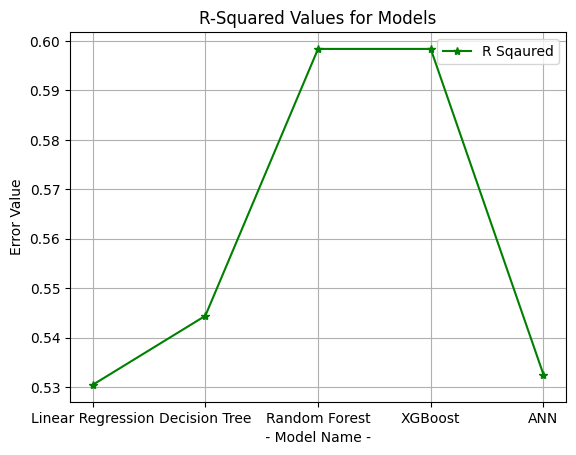

In [ ]:
model_names = [row[0] for row in model_errors]
r2_values = [row[4] for row in model_errors]

fig, axis = plt.subplots()
axis.plot(model_names, r2_values, color='green', marker='*', label='R Sqaured')
axis.set_title('R-Squared Values for Models')
axis.set_xlabel(' - Model Name - ')
axis.set_ylabel('Error Value')
axis.legend()
axis.grid(True)
plt.show()

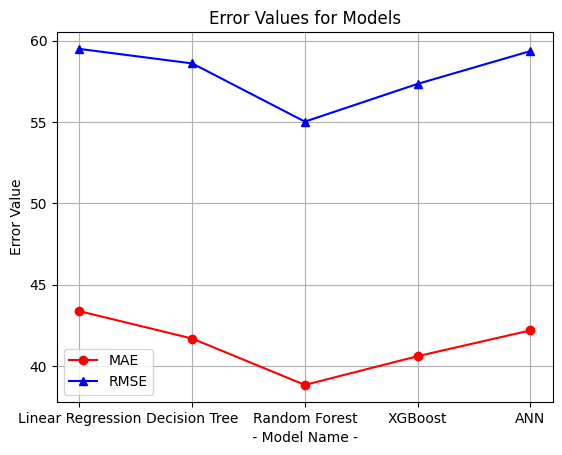

In [ ]:
model_names = [row[0] for row in model_errors]
mae_values = [row[1] for row in model_errors]
rmse_values = [row[3] for row in model_errors]

fig, axis = plt.subplots()
axis.plot(model_names, mae_values, color='red', marker='o', label='MAE')
axis.plot(model_names, rmse_values, color='blue', marker='^', label='RMSE')

axis.set_title('Error Values for Models')
axis.set_xlabel(' - Model Name - ')
axis.set_ylabel('Error Value')
axis.legend()
axis.grid(True)
plt.show()

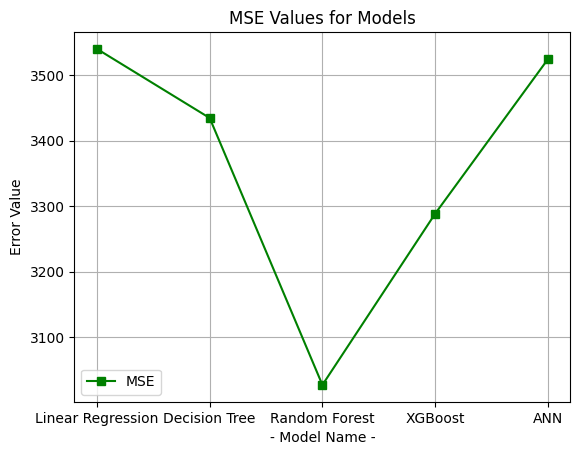

In [ ]:
model_names = [row[0] for row in model_errors]
mse_values = [row[2] for row in model_errors]

fig, axis = plt.subplots()
axis.plot(model_names, mse_values, color='green', marker='s', label='MSE')

axis.set_title('MSE Values for Models')
axis.set_xlabel('- Model Name -')
axis.set_ylabel('Error Value')
axis.legend()
axis.grid(True)
plt.show()

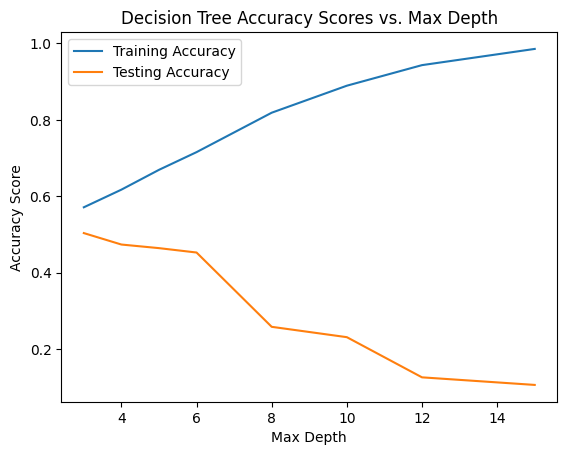

In [ ]:
max_depths = [ 3, 4, 5, 6, 8, 10, 12, 15]
train_scores = []
test_scores = []
for max_depth in max_depths:
    dt = DecisionTreeRegressor(max_depth=max_depth)
    dt.fit(Xtrain, ytrain)
    train_scores.append(dt.score(Xtrain, ytrain))
    test_scores.append(dt.score(Xtst, ytst))

# Plot the training and testing accuracy scores for each max depth
plt.plot(max_depths, train_scores, label='Training Accuracy')
plt.plot(max_depths, test_scores, label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.title('Decision Tree Accuracy Scores vs. Max Depth')
plt.legend()
plt.show()

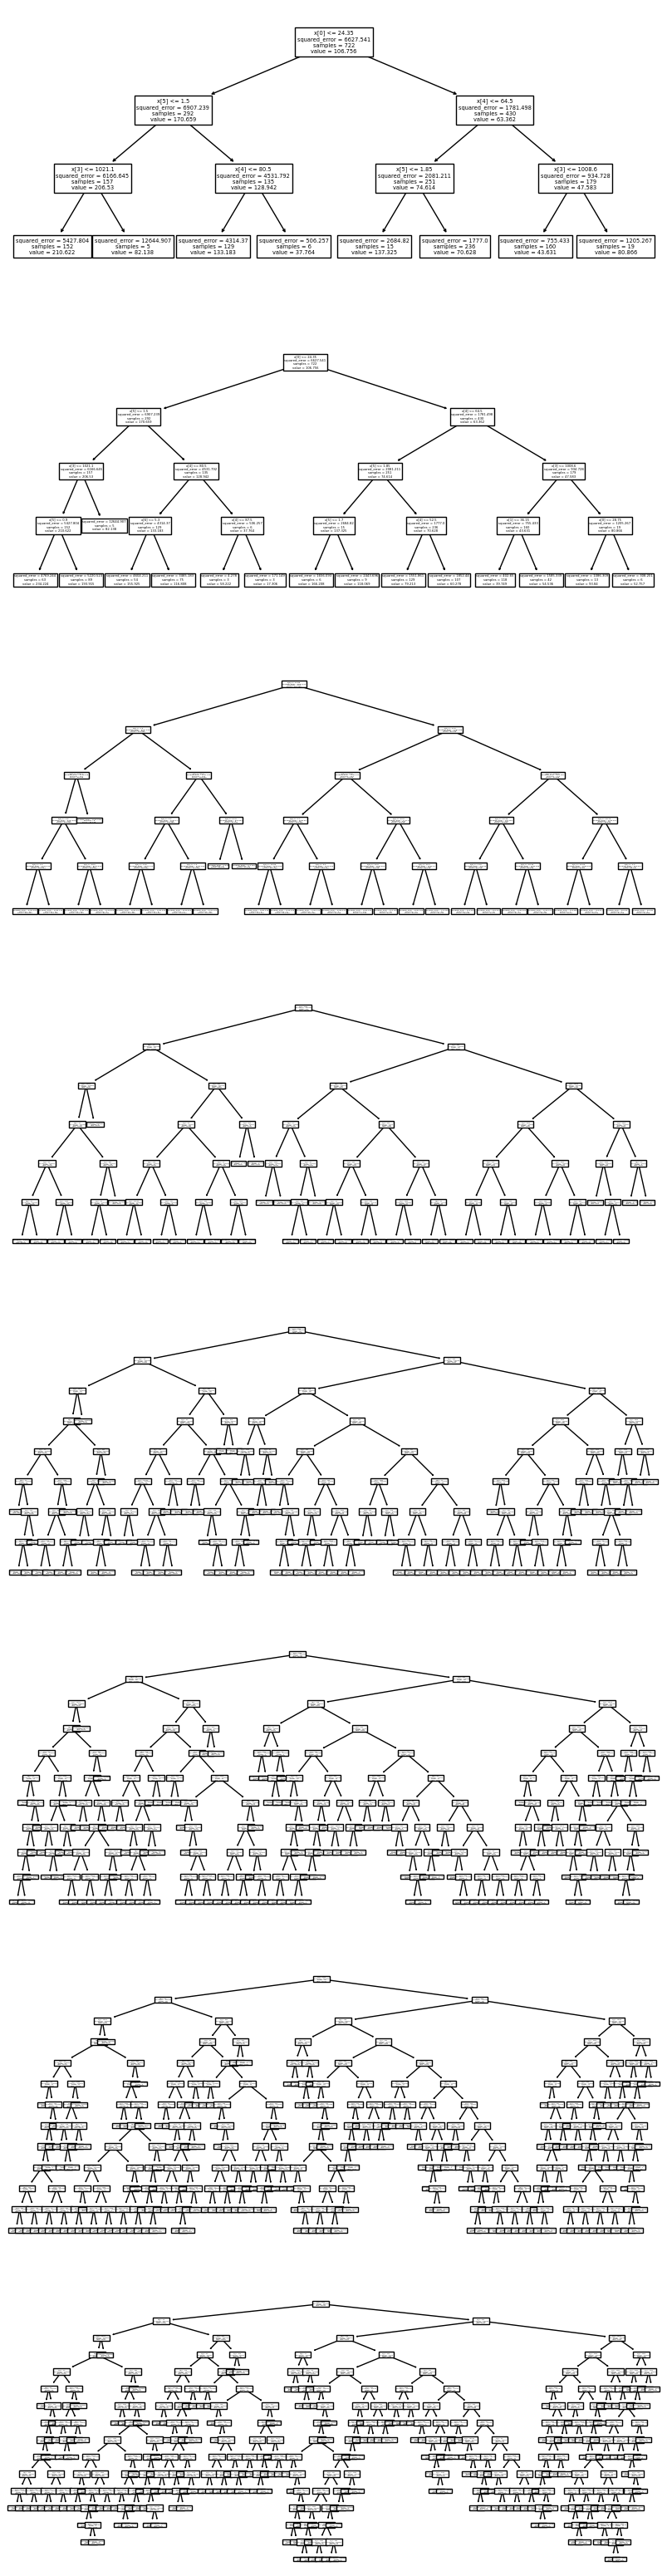

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Define the parameter grid for grid search CV
param_grid = {
    "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
}

# Perform grid search CV
grid_dt = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
grid_dt.fit(Xtrain, ytrain)

# Plot decision trees for different depths
fig, axs = plt.subplots(nrows=len(param_grid['max_depth']), figsize=(10, 40))

for i, max_depth in enumerate(param_grid['max_depth']):
    dt = DecisionTreeRegressor(max_depth=max_depth, 
                               min_samples_leaf=grid_dt.best_params_['min_samples_leaf'])
    dt.fit(Xtrain, ytrain)
    axs[i].set_title(f"Max Depth = {max_depth}")
    plot_tree(dt, ax=axs[i])
    
plt.show()

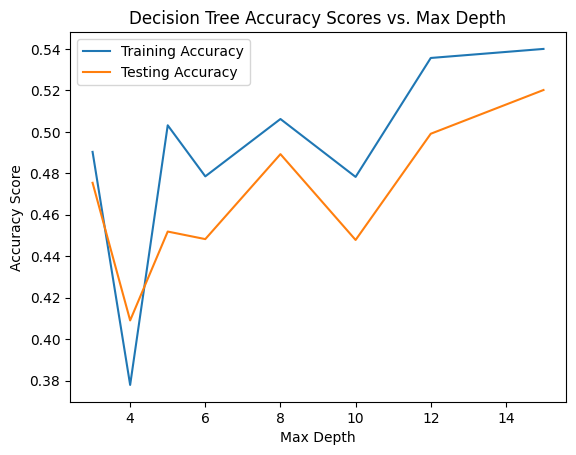

In [ ]:
max_depths = [ 3, 4, 5, 6, 8, 10, 12, 15]
train_scores = []
test_scores = []
for max_depth in max_depths:
    dt = DecisionTreeRegressor(max_depth=max_depth,
                               min_samples_leaf=grid_dt.best_params_['min_samples_leaf'],
                               max_features=grid_dt.best_params_['max_features'],
                               max_leaf_nodes=grid_dt.best_params_['max_leaf_nodes'],
                               min_weight_fraction_leaf=grid_dt.best_params_['min_weight_fraction_leaf'])
    dt.fit(Xtrain, ytrain)
    train_scores.append(dt.score(Xtrain, ytrain))
    test_scores.append(dt.score(Xtst, ytst))

# Plot the training and testing accuracy scores for each max depth
plt.plot(max_depths, train_scores, label='Training Accuracy')
plt.plot(max_depths, test_scores, label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.title('Decision Tree Accuracy Scores vs. Max Depth')
plt.legend()
plt.show()

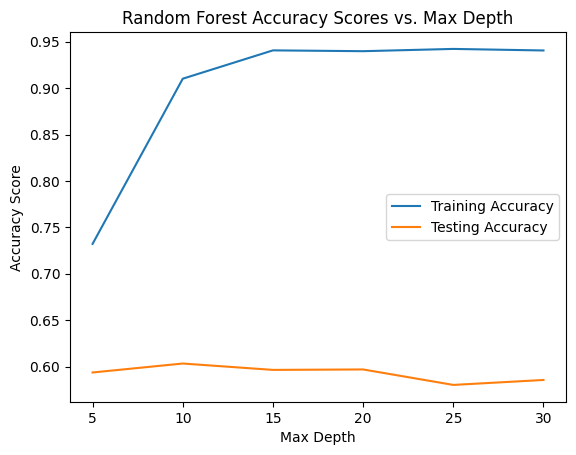

In [ ]:
max_depths = [int(x) for x in np.linspace(5, 30, num = 6)]
train_scores = []
test_scores = []
for max_depth in max_depths:
    dt1 = RandomForestRegressor(max_depth=max_depth)
    dt1.fit(Xtrain, ytrain)
    train_scores.append(dt1.score(Xtrain, ytrain))
    test_scores.append(dt1.score(Xtst, ytst))

# Plot the training and testing accuracy scores for each max depth
plt.plot(max_depths, train_scores, label='Training Accuracy')
plt.plot(max_depths, test_scores, label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.title('Random Forest Accuracy Scores vs. Max Depth')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

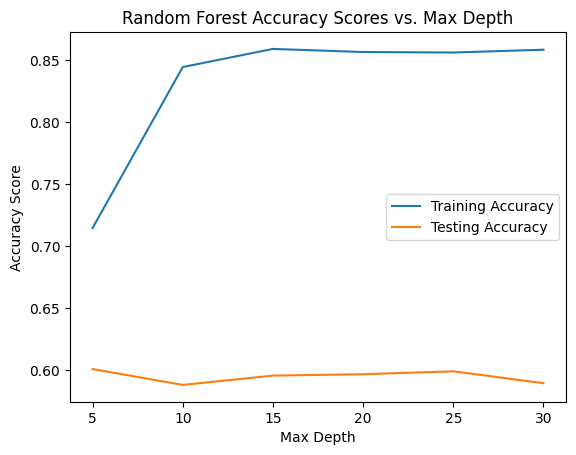

In [ ]:
max_depths = [int(x) for x in np.linspace(5, 30, num = 6)]
train_scores = []
test_scores = []
for max_depth in max_depths:
    rf = RandomForestRegressor(max_depth=max_depth,
                               min_samples_split=random_search.best_params_['min_samples_split'],
                               max_features=random_search.best_params_['max_features'],
                               min_samples_leaf=random_search.best_params_['min_samples_leaf'])
    rf.fit(Xtrain, ytrain)
    train_scores.append(rf.score(Xtrain, ytrain))
    test_scores.append(rf.score(Xtst, ytst))

# Plot the training and testing accuracy scores for each max depth
plt.plot(max_depths, train_scores, label='Training Accuracy')
plt.plot(max_depths, test_scores, label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.title('Random Forest Accuracy Scores vs. Max Depth')
plt.legend()
plt.show()

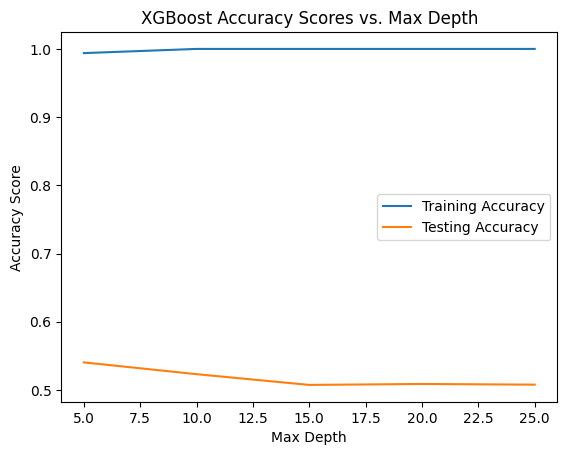

In [ ]:
import xgboost as xg_bst
from sklearn.model_selection import RandomizedSearchCV

max_depths = [int(x) for x in np.linspace(5, 25, num = 5)]
train_scores = []
test_scores = []
for max_depth in max_depths:
    dt3 = xg_bst.XGBRegressor(max_depth=max_depth)
    dt3.fit(Xtrain, ytrain)
    train_scores.append(dt3.score(Xtrain, ytrain))
    test_scores.append(dt3.score(Xtst, ytst))

# Plot the training and testing accuracy scores for each max depth
plt.plot(max_depths, train_scores, label='Training Accuracy')
plt.plot(max_depths, test_scores, label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.title('XGBoost Accuracy Scores vs. Max Depth')
plt.legend()
plt.show()

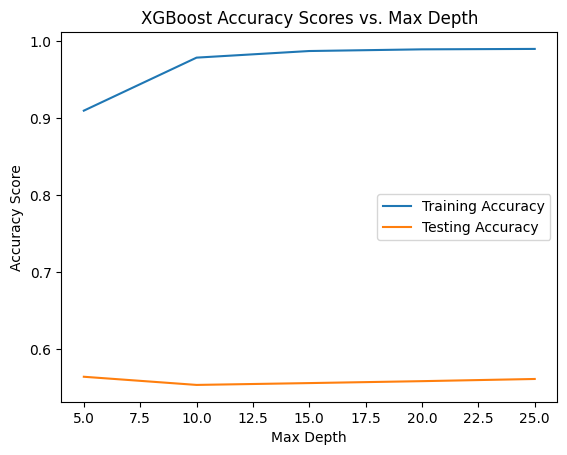

In [ ]:
max_depths = [int(x) for x in np.linspace(5, 25, num = 5)]
train_scores = []
test_scores = []
for max_depth in max_depths:
    xg = xg_bst.XGBRegressor(max_depth=max_depth,
                               subsample=model4_prediction2.best_params_['subsample'],
                               min_child_weight=model4_prediction2.best_params_['min_child_weight'],
                               learning_rate=model4_prediction2.best_params_['learning_rate'],
                             n_estimators=model4_prediction2.best_params_['n_estimators'])
    xg.fit(Xtrain, ytrain)
    train_scores.append(xg.score(Xtrain, ytrain))
    test_scores.append(xg.score(Xtst, ytst))

# Plot the training and testing accuracy scores for each max depth
plt.plot(max_depths, train_scores, label='Training Accuracy')
plt.plot(max_depths, test_scores, label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.title('XGBoost Accuracy Scores vs. Max Depth')
plt.legend()
plt.show()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               1152      
                                                                 
 dense_13 (Dense)            (None, 256)               33024     
                                                                 
 dense_14 (Dense)            (None, 256)               65792     
                                                                 
 dense_15 (Dense)            (None, 1)                 257       
                                                                 
Total params: 100,225
Trainable params: 100,225
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
58/58 [==============================] - 2s 9ms/step - loss: 64.4698 - mean_absolute_error: 64.4698 - val_loss: 63.0207 - val_mean_absolute_error: 63.0207
Epoch 2/100
5

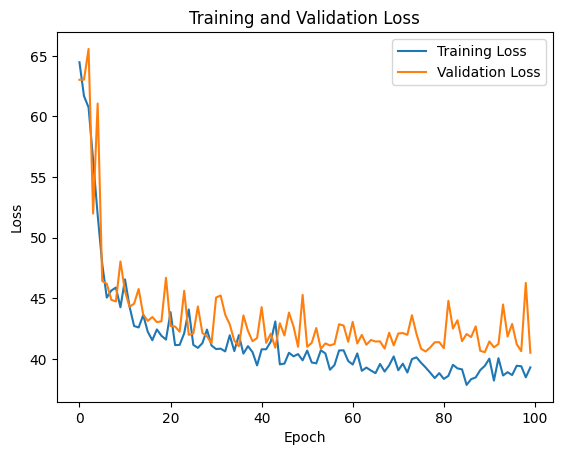

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from keras.callbacks import History


## since problem is a linear regression output should be linear activation and 2 hidden layer to train arbitrary functions
model5 = Sequential()

# Input Layer
model5.add(Dense(128, kernel_initializer='normal',input_dim = Xtrain.shape[1], activation='relu'))

# 2 Hidden Layers with relu activation
model5.add(Dense(256, kernel_initializer='normal',activation='relu'))
model5.add(Dense(256, kernel_initializer='normal',activation='relu'))

# Output Layer
model5.add(Dense(1, kernel_initializer='normal',activation='linear'))


model5.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model5.summary()

# Training Set
history = model5.fit(Xtrain, ytrain, validation_split=0.2, batch_size = 10, epochs=100 )

model5_prediction2 = model5.predict(Xtst)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [ ]:
print(history.history.keys())

dict_keys([])
